<a href="https://colab.research.google.com/github/piotrkm/dengue_data_repo/blob/main/DENGUE_project_grupa_01_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import wyczyszczonych danych z poprzedniego notatnika EDA

In [490]:
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/piotrkm/dengue_data_repo/main/dengue_clean.csv', index_col='serial')
dataset.drop('Unnamed: 0', axis=1, inplace=True)

#dataset = pd.read_csv('https://raw.githubusercontent.com/piotrkm/dengue_data_repo/main/dengue_clean_Alicja.csv')
#dataset.drop('Unnamed: 0', axis=1, inplace=True)
#dataset.drop(['labels'], axis=1, inplace=True)


dataset.head()

,tempmax,tempmin,temp,feelslikemax,dew,humidity,precip,precipcover,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,uvindex,conditions,stations,cases
serial,,,,,,,,,,,,,,,,,
0,34.053151,24.478082,28.709863,39.757808,22.971233,73.508219,2.921726,4.360932,15.678356,1007.911781,50.747945,3.789863,208.097808,7.232877,2.558904,1.197260,4925.0
1,34.086179,25.694309,29.464228,41.338211,23.484553,72.066667,3.783415,2.676748,14.574797,1003.533333,48.313821,2.884553,222.926016,7.504065,1.658537,0.991870,5077.0
2,34.573984,25.417886,29.526829,40.464228,22.580488,69.424390,3.065854,2.337805,14.978049,1005.731707,55.621138,4.242276,229.413008,7.829268,1.910569,1.170732,7579.0
3,33.020325,25.080488,28.727642,37.878049,21.752033,69.297561,6.025203,2.676667,16.504878,1003.359350,50.208130,2.991057,225.421951,7.593496,1.300813,0.146341,13706.0
4,30.660976,24.230894,26.774797,36.586992,24.214634,86.652033,23.336585,15.616992,19.546341,1009.995935,45.542276,3.886992,176.598374,6.186992,0.967480,3.951220,82.0


In [491]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 0 to 601
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempmax           592 non-null    float64
 1   tempmin           592 non-null    float64
 2   temp              592 non-null    float64
 3   feelslikemax      592 non-null    float64
 4   dew               592 non-null    float64
 5   humidity          592 non-null    float64
 6   precip            592 non-null    float64
 7   precipcover       592 non-null    float64
 8   windspeed         592 non-null    float64
 9   sealevelpressure  592 non-null    float64
 10  cloudcover        592 non-null    float64
 11  visibility        592 non-null    float64
 12  solarradiation    592 non-null    float64
 13  uvindex           592 non-null    float64
 14  conditions        592 non-null    float64
 15  stations          592 non-null    float64
 16  cases             592 non-null    float64
dtypes:

In [492]:
#dataset.drop(columns=['conditions', 'stations', 'uvindex', 'feelslikemax', 'sealevelpressure'], inplace=True)

In [493]:
#dataset.reset_index(drop=True, inplace=True)

# Krotkie study danych ilosci zachorowan

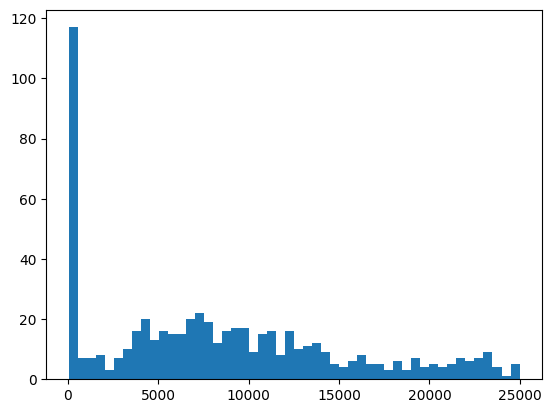

In [494]:
plt.hist(dataset['cases'], bins=50)
plt.show()


In [495]:
dataset['cases'].quantile(0.01)


66.37

In [496]:
dataset[dataset['cases'] < 66].shape

(6, 17)

kasujemy wiersze z iloscia danych mniejsza niz 66 - jako wartosc odstajaca w lewo

In [497]:
dataset.drop(dataset[dataset['cases'] < 66].index, inplace=True)

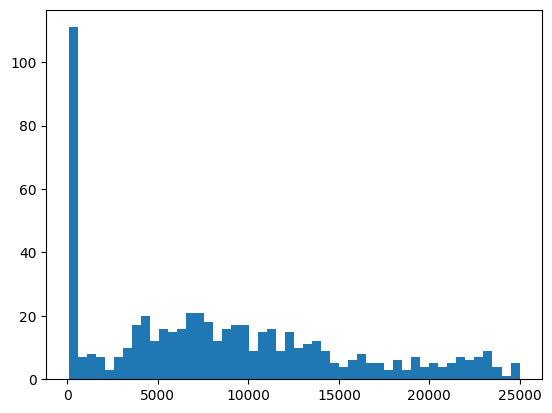

In [498]:
plt.hist(dataset['cases'], bins=50)
plt.show()

Standaryzacja

In [499]:
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = StandardScaler()
#scaler = MinMaxScaler()
#dataset = pd.DataFrame(scaler.fit_transform(dataset), columns=dataset.columns)
#dataset.head()

# Podzial danych
X_train - dane treningowe
y_train - wyniki treningowe

X_test - dane testowe
y_test - wyniki testowe

In [500]:
from sklearn.model_selection import train_test_split
X = dataset.drop('cases', axis=1)
y = dataset['cases']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzymy modele

LinearRegression

In [501]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()

model.fit(X_train, y_train)



LinearRegression()

funkcja to obliczania metryk modelu

In [502]:
def scores(model, X_train, X_test, y_train, y_test):
  train = {'MAE': mean_absolute_error(y_train, model.predict(X_train)).round(3),
           'RMSE': mean_squared_error(y_train, model.predict(X_train), squared=False).round(3),
           'R2': r2_score(y_train, model.predict(X_train)).round(3)
           }
  test = {'MAE': mean_absolute_error(y_test, model.predict(X_test)).round(3),
          'RMSE': mean_squared_error(y_test, model.predict(X_test), squared=False).round(3),
          'R2': r2_score(y_test, model.predict(X_test)).round(3)
          }
  return {'TRAIN': train, 'TEST': test}

In [503]:
scores_LR = scores(model, X_train, X_test, y_train, y_test)
scores_LR

{'TRAIN': {'MAE': 4210.929, 'RMSE': 5221.816, 'R2': 0.405},
 'TEST': {'MAE': 4498.861, 'RMSE': 5672.107, 'R2': 0.316}}

funkcja do generowania wykresow

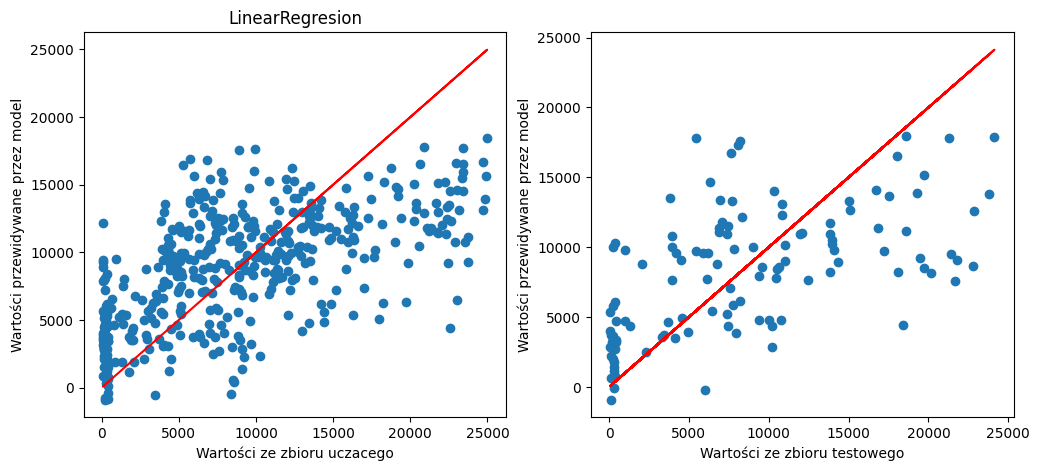

In [504]:
def plots(model_name, model, X_train, X_test, y_train, y_test):
  fig, ax = plt.subplots(1, 2, figsize=(12, 5))
  ax[0].scatter(y_train, model.predict(X_train))
  ax[0].set_xlabel('Wartości ze zbioru uczacego')
  ax[0].set_ylabel('Wartości przewidywane przez model')
  ax[0].plot(y_train, y_train, color='red')
  ax[0].set_title(model_name)
  ax[1].scatter(y_test, model.predict(X_test))
  ax[1].set_xlabel('Wartości ze zbioru testowego')
  ax[1].set_ylabel('Wartości przewidywane przez model')
  ax[1].plot(y_test, y_test, color='red')
  #ax[1].set_title('Wartości ze zbioru testowego')
  plt.show()

plots('LinearRegresion', model, X_train, X_test, y_train, y_test)

model Ridge Regression

In [505]:
model_RG = Ridge(alpha=100)
model_RG.fit(X_train, y_train)

Ridge(alpha=100)

In [506]:
scores_RG = scores(model_RG, X_train, X_test, y_train, y_test)
scores_RG

{'TRAIN': {'MAE': 4233.64, 'RMSE': 5244.847, 'R2': 0.4},
 'TEST': {'MAE': 4434.73, 'RMSE': 5616.524, 'R2': 0.33}}

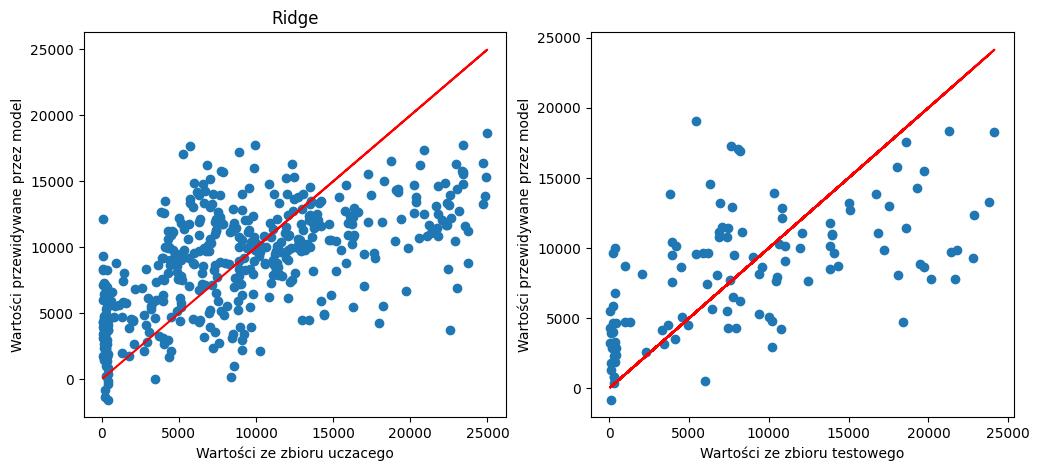

In [507]:
plots('Ridge', model_RG, X_train, X_test, y_train, y_test)

Model Lasso Regression

In [508]:
model_LS = Lasso(alpha=1, max_iter=6000)
model_LS.fit(X_train, y_train)

scores_LS = scores(model_LS, X_train, X_test, y_train, y_test)
scores_LS


{'TRAIN': {'MAE': 4211.376, 'RMSE': 5221.832, 'R2': 0.405},
 'TEST': {'MAE': 4497.939, 'RMSE': 5670.839, 'R2': 0.317}}

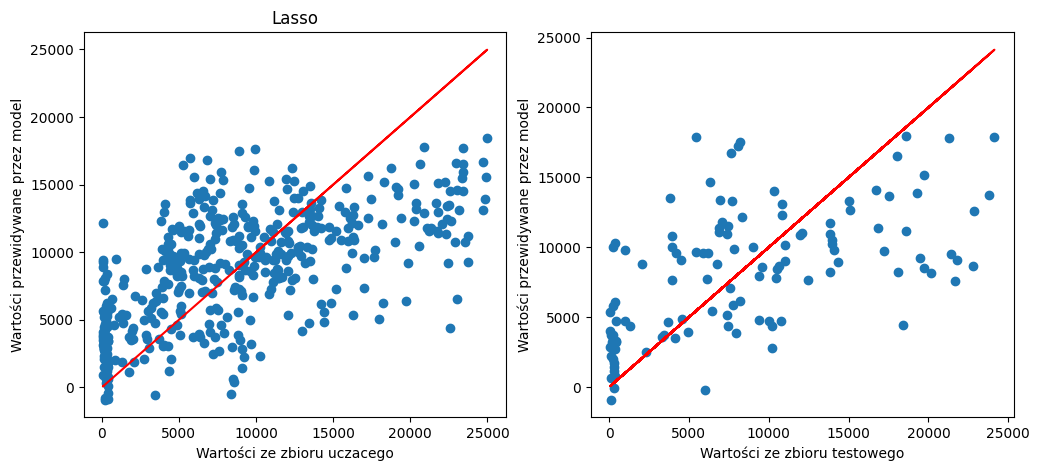

In [509]:
plots('Lasso', model_LS, X_train, X_test, y_train, y_test)

In [510]:
MAE = [scores_LR['TEST']['MAE'], scores_RG['TEST']['MAE'], scores_LS['TEST']['MAE']]
RMSE = [scores_LR['TEST']['RMSE'], scores_RG['TEST']['RMSE'], scores_LS['TEST']['RMSE']]
R2 = [scores_LR['TEST']['R2'], scores_RG['TEST']['R2'], scores_LS['TEST']['R2']]


nieudane wykresy

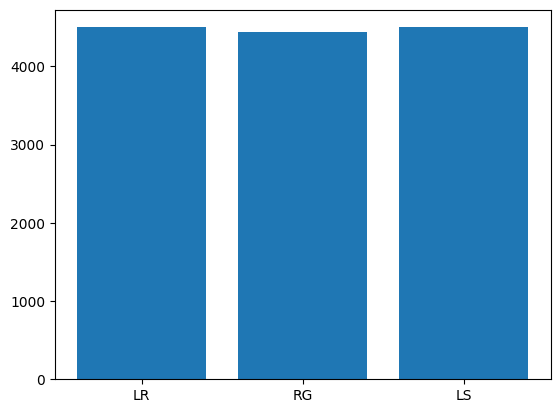

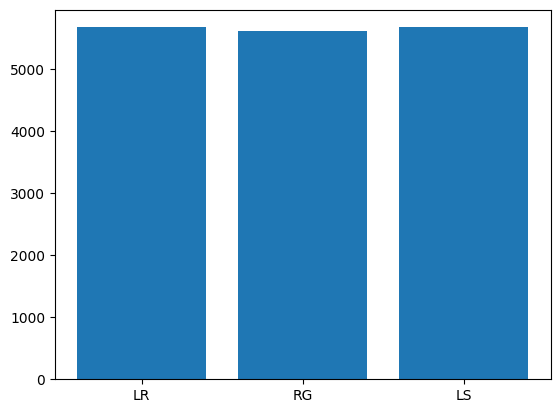

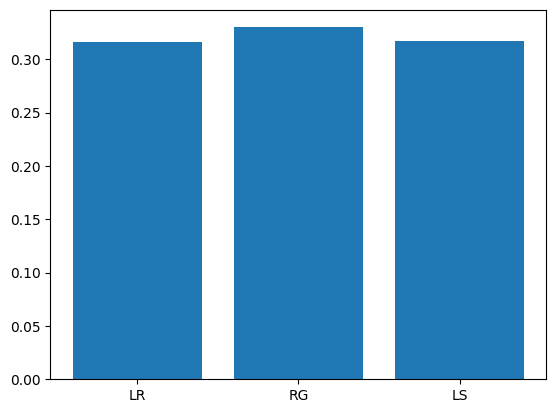

In [511]:
plt.bar(x=['LR', 'RG', 'LS'], height=MAE, label='MAE')
plt.show()

plt.bar(x=['LR', 'RG', 'LS'], height=RMSE, label='RMSE')
plt.show()

plt.bar(x=['LR', 'RG', 'LS'], height=R2, label='R2')
plt.show()